## `-> Importing Libraries`

In [1]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report

import joblib

## `-> Importing Dataset`

In [2]:
data = pd.read_csv('../data/dogvscat_dataset.csv')
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Class
0,0.674510,0.705882,0.729412,0.749020,0.772549,0.792157,0.800000,0.815686,0.827451,0.843137,...,0.054902,0.054902,0.035294,0.015686,0.015686,0.007843,0.007843,0.007843,0.007843,1
1,0.164706,0.227451,0.149020,0.164706,0.172549,0.145098,0.149020,0.152941,0.160784,0.172549,...,0.254902,0.337255,0.211765,0.152941,0.196078,0.227451,0.223529,0.243137,0.113725,1
2,0.172549,0.184314,0.207843,0.227451,0.219608,0.203922,0.200000,0.188235,0.164706,0.172549,...,0.290196,0.290196,0.305882,0.454902,0.615686,0.619608,0.560784,0.639216,0.647059,1
3,0.866667,0.878431,0.921569,0.929412,0.874510,0.890196,0.913725,0.894118,0.886274,0.878431,...,0.964706,0.960784,0.929412,0.894118,0.850980,0.803922,0.823529,0.862745,0.831373,1
4,0.443137,0.486274,0.356863,0.525490,0.772549,0.600000,0.811765,0.901961,0.588235,0.992157,...,0.392157,0.384314,0.376471,0.392157,0.345098,0.325490,0.419608,0.356863,0.356863,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 2501 entries, pixel0 to Class
dtypes: float64(2500), int64(1)
memory usage: 477.0 MB


In [4]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Class
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,0.447797,0.450196,0.453264,0.455684,0.458613,0.461118,0.463462,0.465264,0.465533,0.467604,...,0.497296,0.494384,0.492217,0.490494,0.487151,0.483768,0.479974,0.475683,0.471950,1.50000
std,0.271964,0.270934,0.270031,0.269982,0.270198,0.270023,0.270249,0.269228,0.269550,0.269537,...,0.256673,0.256428,0.255913,0.256566,0.256601,0.256358,0.257822,0.258670,0.259760,0.50001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.223529,0.223529,0.231373,0.231373,0.235294,0.239216,0.239216,0.243137,0.243137,0.243137,...,0.294118,0.294118,0.294118,0.290196,0.286275,0.282353,0.278431,0.270588,0.266667,1.00000
50%,0.427451,0.427451,0.435294,0.435294,0.439216,0.443137,0.447059,0.450980,0.447059,0.450980,...,0.490196,0.486274,0.482353,0.482353,0.478431,0.478431,0.470588,0.466667,0.458824,1.50000
75%,0.647059,0.650980,0.654902,0.654902,0.658824,0.662745,0.666667,0.666667,0.666667,0.670588,...,0.690196,0.682353,0.682353,0.682353,0.674510,0.670588,0.666667,0.662745,0.658824,2.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000


In [5]:
image_dims = data[:1].shape[1] - 1
h, w = int(np.sqrt(image_dims)), int(np.sqrt(image_dims))
print(h, w)

50 50


## `1. Data Preprocessing`

### `1.1 Handling Null Values`

In [6]:
null_values = data.isnull().sum()
print(len(null_values[null_values > 0]))

0


### `1.2 Handling Duplicates`

In [7]:
dups = int(data.duplicated().sum())
print(f'Duplicates in the dataset -> {dups}')
data = data.drop_duplicates()
print(f'Duplicates in the dataset -> {data.duplicated().sum()}')

Duplicates in the dataset -> 6
Duplicates in the dataset -> 0


In [8]:
print(data.shape)
data.head()

(24994, 2501)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Class
0,0.674510,0.705882,0.729412,0.749020,0.772549,0.792157,0.800000,0.815686,0.827451,0.843137,...,0.054902,0.054902,0.035294,0.015686,0.015686,0.007843,0.007843,0.007843,0.007843,1
1,0.164706,0.227451,0.149020,0.164706,0.172549,0.145098,0.149020,0.152941,0.160784,0.172549,...,0.254902,0.337255,0.211765,0.152941,0.196078,0.227451,0.223529,0.243137,0.113725,1
2,0.172549,0.184314,0.207843,0.227451,0.219608,0.203922,0.200000,0.188235,0.164706,0.172549,...,0.290196,0.290196,0.305882,0.454902,0.615686,0.619608,0.560784,0.639216,0.647059,1
3,0.866667,0.878431,0.921569,0.929412,0.874510,0.890196,0.913725,0.894118,0.886274,0.878431,...,0.964706,0.960784,0.929412,0.894118,0.850980,0.803922,0.823529,0.862745,0.831373,1
4,0.443137,0.486274,0.356863,0.525490,0.772549,0.600000,0.811765,0.901961,0.588235,0.992157,...,0.392157,0.384314,0.376471,0.392157,0.345098,0.325490,0.419608,0.356863,0.356863,1


In [9]:
data = data.astype('float32')
data.Class = data.Class.astype('int8')

In [10]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Class
0,0.674510,0.705882,0.729412,0.749020,0.772549,0.792157,0.800000,0.815686,0.827451,0.843137,...,0.054902,0.054902,0.035294,0.015686,0.015686,0.007843,0.007843,0.007843,0.007843,1
1,0.164706,0.227451,0.149020,0.164706,0.172549,0.145098,0.149020,0.152941,0.160784,0.172549,...,0.254902,0.337255,0.211765,0.152941,0.196078,0.227451,0.223529,0.243137,0.113725,1
2,0.172549,0.184314,0.207843,0.227451,0.219608,0.203922,0.200000,0.188235,0.164706,0.172549,...,0.290196,0.290196,0.305882,0.454902,0.615686,0.619608,0.560784,0.639216,0.647059,1
3,0.866667,0.878431,0.921569,0.929412,0.874510,0.890196,0.913725,0.894118,0.886275,0.878431,...,0.964706,0.960784,0.929412,0.894118,0.850980,0.803922,0.823529,0.862745,0.831373,1
4,0.443137,0.486275,0.356863,0.525490,0.772549,0.600000,0.811765,0.901961,0.588235,0.992157,...,0.392157,0.384314,0.376471,0.392157,0.345098,0.325490,0.419608,0.356863,0.356863,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24994 entries, 0 to 24999
Columns: 2501 entries, pixel0 to Class
dtypes: float32(2500), int8(1)
memory usage: 238.6 MB


## `2. Data Visualization`

### `2.1 Visualizing Data Distribution`

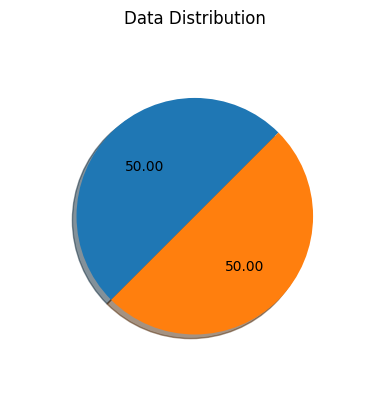

In [12]:
plt.pie(x = data['Class'].value_counts(), autopct = '%.2f', shadow=True, startangle= 45, radius = 0.8)
plt.title('Data Distribution')
plt.show()

### `2.2 Visualizing Cat Image`

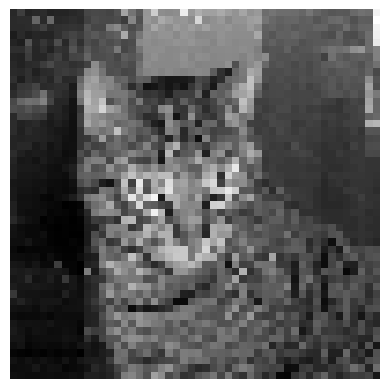

In [13]:
img = (data.iloc[1, :-1].values)
img = img.reshape((w,h))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

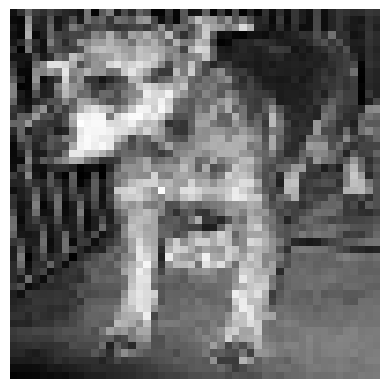

In [14]:
img = data.iloc[12503, :-1].values
img = img.reshape((h,w))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()

## `3. Feature Engineering`

In [15]:
X = data.iloc[:,:-1]
Y = data.Class

### `3.1 Finding optimal number of components using IncrementalPCA`

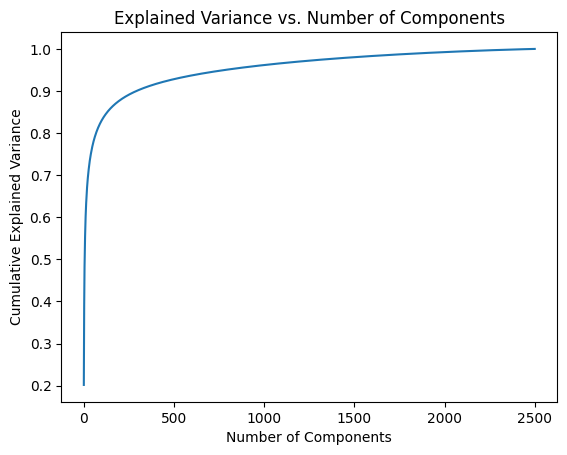

In [16]:
n_components = h*w  # starting with max possible components
ipca = IncrementalPCA(n_components=n_components, batch_size = h*w)

pca_dataset = ipca.fit(X)

explained_variance_ratio = np.cumsum(ipca.explained_variance_ratio_)

plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [17]:
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(n_components)

def get_components():
    return n_components

783


### `3.2 PCA`

In [18]:
pca = PCA(n_components = n_components)
new_X = pca.fit_transform(X)

In [19]:
new_X = pd.DataFrame(new_X, columns=[f'pixel{i}' for i in range(n_components)])
new_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782
0,4.596668,-6.302325,-10.564954,-0.666393,1.200095,2.412576,0.175369,0.902826,-0.456638,2.042241,...,-0.019250,0.032375,-0.053599,-0.012959,0.022873,0.040216,-0.010182,-0.003464,0.012087,-0.010662
1,-9.326869,-2.127187,-2.110008,1.014026,-2.165713,0.209768,-0.765216,-1.703676,-0.247046,-0.211777,...,0.007092,-0.068864,-0.063371,0.005731,-0.025673,-0.074366,-0.143768,-0.080652,-0.060327,0.040255
2,-2.236726,1.813492,-2.024512,2.702574,2.305647,3.916588,0.803162,-3.642138,3.186169,-1.143781,...,0.031041,-0.089870,0.140173,-0.014935,0.006627,-0.150473,0.089868,0.060842,0.161927,0.116657
3,10.912269,-0.996251,1.761436,0.413975,3.360663,-3.482522,-3.327167,0.105761,2.173993,1.433042,...,-0.057859,-0.010103,0.144474,0.040982,0.106785,-0.024742,0.037890,-0.009416,0.081308,-0.014605
4,-5.002191,4.266300,-3.730438,-1.794443,-5.005129,-2.011770,-2.547464,-0.043602,3.676275,3.108994,...,-0.035116,-0.111804,-0.076957,-0.027639,0.145211,0.027647,-0.000383,0.005095,0.082264,-0.026980


In [20]:
new_X = new_X.astype('float16')

In [21]:
new_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782
0,4.597656,-6.300781,-10.562500,-0.666504,1.200195,2.412109,0.175415,0.902832,-0.456543,2.042969,...,-0.019257,0.032379,-0.053589,-0.012962,0.022873,0.040222,-0.010185,-0.003464,0.012085,-0.010658
1,-9.328125,-2.126953,-2.109375,1.013672,-2.166016,0.209717,-0.765137,-1.704102,-0.247070,-0.211792,...,0.007092,-0.068848,-0.063354,0.005730,-0.025681,-0.074341,-0.143799,-0.080627,-0.060333,0.040253
2,-2.236328,1.813477,-2.025391,2.703125,2.304688,3.916016,0.803223,-3.642578,3.185547,-1.143555,...,0.031036,-0.089844,0.140137,-0.014938,0.006626,-0.150513,0.089844,0.060852,0.161987,0.116638
3,10.914062,-0.996094,1.761719,0.414062,3.361328,-3.482422,-3.328125,0.105774,2.173828,1.432617,...,-0.057861,-0.010101,0.144531,0.040985,0.106812,-0.024734,0.037903,-0.009415,0.081299,-0.014603
4,-5.003906,4.265625,-3.730469,-1.794922,-5.003906,-2.011719,-2.546875,-0.043610,3.675781,3.109375,...,-0.035126,-0.111816,-0.076965,-0.027634,0.145264,0.027649,-0.000383,0.005096,0.082275,-0.026978


## `4. Splitting the dataset`

In [22]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.20, stratify = Y)

In [23]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2490,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499
6026,0.180392,0.188235,0.192157,0.207843,0.227451,0.192157,0.172549,0.200000,0.215686,0.219608,...,0.278431,0.270588,0.356863,0.392157,0.388235,0.337255,0.384314,0.458824,0.509804,0.415686
10151,0.258824,0.274510,0.274510,0.235294,0.258824,0.278431,0.274510,0.278431,0.298039,0.294118,...,0.407843,0.525490,0.462745,0.494118,0.494118,0.513726,0.462745,0.458824,0.568627,0.639216
1224,0.184314,0.298039,0.329412,0.258824,0.156863,0.454902,0.329412,0.298039,0.380392,0.419608,...,0.858824,0.874510,0.878431,0.913725,0.858824,0.870588,0.800000,0.847059,0.890196,0.890196
7206,0.109804,0.219608,0.423529,0.098039,0.305882,0.290196,0.070588,0.223529,0.415686,0.094118,...,0.133333,0.117647,0.239216,0.105882,0.109804,0.098039,0.062745,0.113725,0.043137,0.058824
19352,0.098039,0.129412,0.121569,0.145098,0.145098,0.121569,0.129412,0.133333,0.145098,0.152941,...,0.482353,0.450980,0.474510,0.486275,0.392157,0.152941,0.188235,0.462745,0.454902,0.470588


In [24]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2490,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499
19902,0.156863,0.129412,0.156863,0.141176,0.188235,0.192157,0.192157,0.184314,0.113725,0.211765,...,0.219608,0.235294,0.200000,0.235294,0.239216,0.203922,0.203922,0.211765,0.188235,0.180392
6040,0.345098,0.317647,0.298039,0.294118,0.372549,0.411765,0.262745,0.407843,0.447059,0.458824,...,0.635294,0.611765,0.584314,0.764706,0.666667,0.643137,0.478431,0.533333,0.423529,0.329412
3615,0.513726,0.521569,0.501961,0.513726,0.486275,0.498039,0.317647,0.313726,0.305882,0.282353,...,0.850980,0.874510,0.850980,0.843137,0.862745,0.823529,0.780392,0.803922,0.788235,0.792157
5178,0.596078,0.223529,0.627451,0.650980,0.643137,0.435294,0.631373,0.650980,0.643137,0.639216,...,0.831373,0.792157,0.800000,0.866667,0.874510,0.831373,0.870588,0.878431,0.901961,0.886275
21404,0.341176,0.321569,0.298039,0.278431,0.258824,0.250980,0.266667,0.258824,0.270588,0.290196,...,0.427451,0.368627,0.458824,0.458824,0.392157,0.298039,0.513726,0.658824,0.647059,0.658824


In [25]:
y_test.value_counts()

Class
2    2500
1    2499
Name: count, dtype: int64

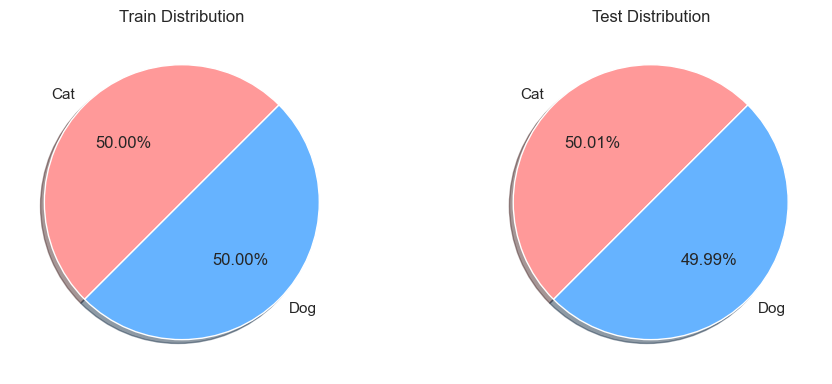

In [27]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

pie_colors = ['#FF9999', '#66B3FF']

ax[0].pie(y_train.value_counts(), autopct='%.2f%%', shadow=True, startangle=45, labels=['Cat', 'Dog'], colors=pie_colors)
ax[0].set_title('Train Distribution')

ax[1].pie(y_test.value_counts(), autopct='%.2f%%', shadow=True, startangle=45, labels=['Cat', 'Dog'], colors=pie_colors)
ax[1].set_title('Test Distribution')

sns.despine()
plt.tight_layout()
plt.show()

## `5. Model Training`

### `5.1 Training Pipeline`

In [28]:
start = time.time()
# not using pca transformed values, because of poor performance
svc = SVC(cache_size=8192, C = 3)
trained_model = svc.fit(X_train, y_train)
end = time.time()
print(end - start)

2543.3792498111725


In [29]:
test_pred = trained_model.predict(X_test)
train_pred = trained_model.predict(X_train)

In [30]:
# C-4 6679
print('R2 Score on test set ->', r2_score(y_true = y_test, y_pred = test_pred))
print('Accuracy Score on test set ->',accuracy_score(y_true = y_test, y_pred = test_pred))
print('Classifiation Report on test set ->\n',classification_report(y_true = y_test, y_pred = test_pred))
print('Confusion Matrix on test set ->\n', confusion_matrix(y_test, test_pred), '\n\n\n')

print('R2 Score on train set ->',r2_score(y_true = y_train, y_pred = train_pred))
print('Accuracy Score on train set ->',accuracy_score(y_true = y_train, y_pred = train_pred))
print('Classification Report on train set ->\n',classification_report(y_true = y_train, y_pred = train_pred))
print('Confusion Matrix on train set ->',confusion_matrix(y_train, train_pred))

R2 Score on test set -> -0.3698740296118448
Accuracy Score on test set -> 0.6575315063012602
Classifiation Report on test set ->
               precision    recall  f1-score   support

           1       0.66      0.64      0.65      2499
           2       0.65      0.67      0.66      2500

    accuracy                           0.66      4999
   macro avg       0.66      0.66      0.66      4999
weighted avg       0.66      0.66      0.66      4999

Confusion Matrix on test set ->
 [[1608  891]
 [ 821 1679]] 



R2 Score on train set -> 0.8317579390640556
Accuracy Score on train set -> 0.9579394848712178
Classification Report on train set ->
               precision    recall  f1-score   support

           1       0.96      0.95      0.96      9998
           2       0.95      0.96      0.96      9997

    accuracy                           0.96     19995
   macro avg       0.96      0.96      0.96     19995
weighted avg       0.96      0.96      0.96     19995

Confusion Matrix on

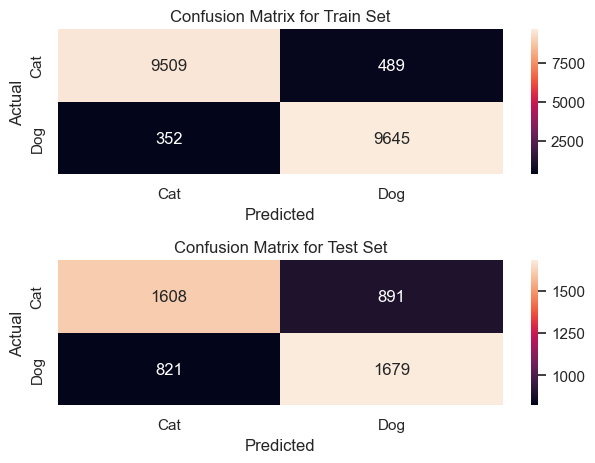

In [31]:
plt.subplot(2,1,1)
sns.heatmap(confusion_matrix(y_train, train_pred), annot = True, fmt = '', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix for Train Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(2,1,2)
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True, fmt = '', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix for Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')


plt.tight_layout()
plt.show()

## `6. Exporting the model`

In [33]:
joblib.dump(filename='../models/dogcat_model.pkl', value = trained_model)

['../models/dogcat_model.pkl']